# Evaporation from KNMI data
*R.A. Collenteur, University of Graz, 2020*

In this notebook it is shown how to compute (potential) evaporation from meteorological data observed by the KNMI at De Bilt in the Netherlands.

In [1]:
import pandas as pd
import pyet as pyet

## 1. Load KNMI Data


- DDVEC     = Vectorgemiddelde windrichting in graden (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil/variabel). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken / Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable)
- FHVEC     = Vectorgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken / Vector mean windspeed (in 0.1 m/s)
- FG        = Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s) 
- FHX       = Hoogste uurgemiddelde windsnelheid (in 0.1 m/s) / Maximum hourly mean windspeed (in 0.1 m/s)
- FHXH      = Uurvak waarin FHX is gemeten / Hourly division in which FHX was measured
- FHN       = Laagste uurgemiddelde windsnelheid (in 0.1 m/s) / Minimum hourly mean windspeed (in 0.1 m/s)
- FHNH      = Uurvak waarin FHN is gemeten / Hourly division in which FHN was measured
- FXX       = Hoogste windstoot (in 0.1 m/s) / Maximum wind gust (in 0.1 m/s)
- FXXH      = Uurvak waarin FXX is gemeten / Hourly division in which FXX was measured
- TG        = Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
- TN        = Minimum temperatuur (in 0.1 graden Celsius) / Minimum temperature (in 0.1 degrees Celsius)
- TNH       = Uurvak waarin TN is gemeten / Hourly division in which TN was measured
- TX        = Maximum temperatuur (in 0.1 graden Celsius) / Maximum temperature (in 0.1 degrees Celsius)
- TXH       = Uurvak waarin TX is gemeten / Hourly division in which TX was measured
- T10N      = Minimum temperatuur op 10 cm hoogte (in 0.1 graden Celsius) / Minimum temperature at 10 cm above surface (in 0.1 degrees Celsius)
- T10NH     = 6-uurs tijdvak waarin T10N is gemeten / 6-hourly division in which T10N was measured; 6=0-6 UT, 12=6-12 UT, 18=12-18 UT, 24=18-24 UT 
- SQ        = Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour)
- SP        = Percentage van de langst mogelijke zonneschijnduur / Percentage of maximum potential sunshine duration
- Q         = Globale straling (in J/cm2) / Global radiation (in J/cm2)
- DR        = Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
- RH        = Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- RHX       = Hoogste uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
- RHXH      = Uurvak waarin RHX is gemeten / Hourly division in which RHX was measured
- PG        = Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values
- PX        = Hoogste uurwaarde van de luchtdruk herleid tot zeeniveau (in 0.1 hPa) / Maximum hourly sea level pressure (in 0.1 hPa)
- PXH       = Uurvak waarin PX is gemeten / Hourly division in which PX was measured
- PN        = Laagste uurwaarde van de luchtdruk herleid tot zeeniveau (in 0.1 hPa) / Minimum hourly sea level pressure (in 0.1 hPa)
- PNH       = Uurvak waarin PN is gemeten / Hourly division in which PN was measured
- VVN       = Minimum opgetreden zicht / Minimum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
- VVNH      = Uurvak waarin VVN is gemeten / Hourly division in which VVN was measured
- VVX       = Maximum opgetreden zicht / Maximum visibility; 0: <100 m, 1:100-200 m, 2:200-300 m,..., 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)
- VVXH      = Uurvak waarin VVX is gemeten / Hourly division in which VVX was measured
- NG        = Etmaalgemiddelde bewolking (bedekkingsgraad van de bovenlucht in achtsten, 9=bovenlucht onzichtbaar) / Mean daily cloud cover (in octants, 9=sky invisible)
- UG        = Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)
- UX        = Maximale relatieve vochtigheid (in procenten) / Maximum relative atmospheric humidity (in percents)
- UXH       = Uurvak waarin UX is gemeten / Hourly division in which UX was measured
- UN        = Minimale relatieve vochtigheid (in procenten) / Minimum relative atmospheric humidity (in percents)
- UNH       = Uurvak waarin UN is gemeten / Hourly division in which UN was measured
- EV24      = Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)

In [2]:
data = pd.read_csv("data/etmgeg_260.txt", skiprows=46, delimiter=",", 
                   skipinitialspace=True, index_col="YYYYMMDD", parse_dates=True)
data.head()

,# STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
1980-01-01,260,275,21,26,46,1,10,9,98.0,1.0,...,8.0,75.0,10.0,5.0,93,100,23,85,17,3
1980-01-02,260,314,15,15,26,1,10,4,77.0,12.0,...,12.0,70.0,1.0,4.0,95,99,8,86,2,3
1980-01-03,260,171,21,26,62,24,0,3,103.0,23.0,...,8.0,70.0,4.0,6.0,97,99,2,89,21,1
1980-01-04,260,182,46,51,67,1,26,20,118.0,1.0,...,23.0,58.0,6.0,8.0,97,99,19,93,4,0
1980-01-05,260,203,36,36,46,12,26,1,87.0,9.0,...,2.0,56.0,17.0,8.0,97,99,22,94,15,1


## 2. Makkink evaporation

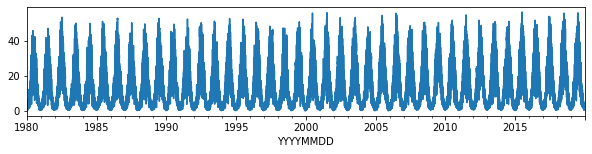

In [11]:
et_makkink = pyet.makkink(data.TX/10, data.TN/10, data.Q/10, 1, 1.0)
et_makkink.plot(figsize=(10,2));

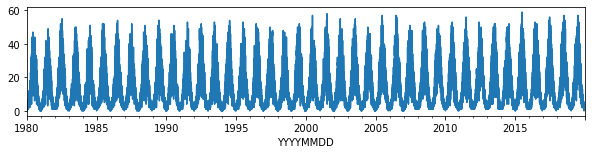

In [12]:
(data.EV24).plot(figsize=(10,2));

## 3. Penman-Monteith